In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
testcsv = ('/content/drive/MyDrive/github/test.csv')

In [ ]:
test = pd.read_csv(testcsv)
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [ ]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
traincsv = ('/content/drive/MyDrive/github/train.csv')

In [ ]:
train = pd.read_csv(traincsv)
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:

print(set(test.columns)-set(train.columns))
print(set(train.columns)-set(test.columns))
print(train["price_range"].describe())

{'id'}
{'price_range'}
count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64


In [ ]:
import numpy as np

In [ ]:
train_price_y = np.array(train["price_range"])
print((train_price_y))
data = train_price_y
shape = (data.size, data.max()+1)
one_hot_y = np.zeros(shape)
rows = np.arange(data.size)
one_hot_y[rows, data] = 1
print(one_hot_y)

[1 2 2 ... 3 0 3]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
test_x = test.drop(columns=["id"])
train_x = train.drop(columns=["price_range"])

In [ ]:
# doing as a linear regression
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(len(train_x.columns), input_dim=len(train_x.columns), activation='relu'))
model.add(Dense(len(train_x.columns)/2, input_dim=len(train_x.columns), activation='sigmoid'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, one_hot_y, epochs=500, batch_size=64)

Epoch 1/500
32/32 [==============================] - 1s 1ms/step - loss: 1.4609 - accuracy: 0.2471
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 1.3873 - accuracy: 0.2419
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 1.3863 - accuracy: 0.2316
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 1.3921 - accuracy: 0.2292
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 1.3668 - accuracy: 0.2639
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 1.3586 - accuracy: 0.2914
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 1.3467 - accuracy: 0.3379
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 1.3292 - accuracy: 0.3625
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 1.3025 - accuracy: 0.3762
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 1.2857 - accuracy: 0.3937
Epoch 11/

In [ ]:
nn_predict = model.predict(train_x)
# a = accuracy_score(pred,test)
# print('Accuracy is:', a*100)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_x,train_price_y)

#cheat
y_model = model.predict(train_x)
from sklearn.metrics import accuracy_score
accuracy_score(train_price_y, y_model)

0.944

In [ ]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2 = train_test_split(train_x,train_price_y, random_state=64, train_size=0.7)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=50)
model.fit(x1,y1)

#predict
y_model = model.predict(x2)
from sklearn.metrics import accuracy_score
accuracy_score(y2, y_model)

0.92

In [ ]:
X = train_x
y = train_price_y
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X,y,cv=5))

from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X,y,cv=LeaveOneOut().split(X))
print(scores.mean())

[0.93   0.9425 0.92   0.93   0.905 ]
0.928


Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors":np.arange(1,100)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7)
grid.fit(X,y)


GridSearchCV(cv=7, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [ ]:
print(grid.best_params_)
model = grid.best_estimator_
import matplotlib.pyplot as plt

{'n_neighbors': 12}


In [ ]:
y_test = model.fit(x1,y1).predict(x2)

In [ ]:
accuracy_score(y2, y_test)

0.9266666666666666

**Pทำ**

In [ ]:
from sklearn.svm import SVC

In [ ]:
import time
import datetime

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_x,train_price_y, random_state=64, train_size=0.7)

In [ ]:
C = 1 #@param {type:"slider", min:1.0, max:3.0, step:0.1}
kernel = "linear" #@param ['linear', 'poly', 'rbf']
gamma = "auto"  #@param ['scale', 'auto']

svm = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096,
   random_state=0
)

svm_start_time = time.time()
model=svm.fit(X_train,y_train)
svm_end_time = time.time()
print(f"Training Time: {datetime.timedelta(seconds=svm_end_time-svm_start_time)}")

Training Time: 0:00:09.156670


In [ ]:
#predict
y_model = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9683333333333334

In [ ]:
# Predict as Class
train_predict = svm.predict(X_train)
test_predict = svm.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, test_predict, labels=[1, 0])

array([[143,   1],
       [  2, 141]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.97      0.94      0.96       152
           2       0.93      0.96      0.95       149
           3       0.97      0.99      0.98       156

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [ ]:
y_train = np.array(train["price_range"])

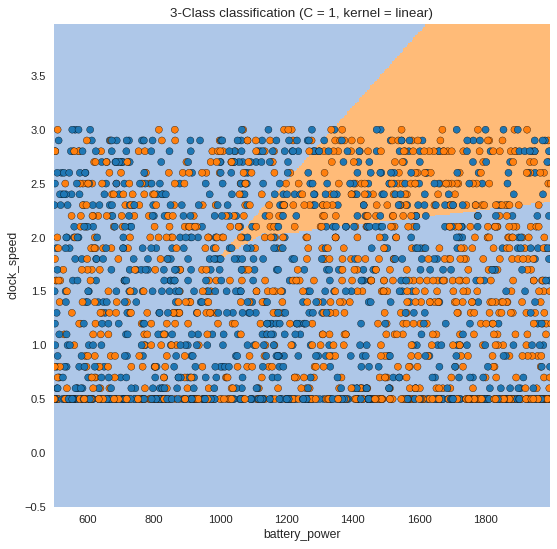

In [ ]:
#@markdown # **Select parameters to plot**
#@markdown **(On simplyfied model for visualization - 2 variables)**

#@markdown Adapt from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
#@markdown **Suggest Parameters**  
#@markdown * **x_label**: Sex  
#@markdown * **y_label**: SibSp  
#@markdown Try on Different kernels to see hyperplanes.
C = 1
kernel = "linear" #@param ['linear', 'poly', 'rbf']
gamma = "auto"

# x_label = 'sepal length (cm)' #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# y_label = 'petal length (cm)' #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


x_label = 'battery_power' #@param ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
y_label = 'clock_speed' #@param ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

x_idx = train.columns.to_list().index(x_label)
y_idx = train.columns.to_list().index(y_label)

# Script from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

from matplotlib import cm
from matplotlib.colors import ListedColormap
cmap_val = np.linspace(0.0, 1.0, 20)
cmap_light = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[1:5:2])
cmap_bold = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[:4:2])
h = 300  # step size in the mesh

model = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096
)
model.fit(train.iloc[:, [x_idx, y_idx]], y_train)
x_min, x_max = train.iloc[:, x_idx].min() - 1, train.iloc[:, x_idx].max() + 1
y_min, y_max = train.iloc[:, y_idx].min() - 1, train.iloc[:, y_idx].max() + 1
xx, yy = np.meshgrid(
  np.arange(x_min, x_max, (x_max-x_min)/h),
  np.arange(y_min, y_max, (y_max-y_min)/h)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(
  train.iloc[:, x_idx],
  train.iloc[:, y_idx],
  c=y_train,
  cmap=cmap_bold,
  edgecolor='k',
  s=40
)
plt.xlabel(x_label)
plt.xlim(xx.min(), xx.max())
plt.ylabel(y_label)
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (C = {C}, kernel = {kernel})")
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train_x,train_price_y, random_state=64, train_size=0.7)

In [ ]:
# Model 1: Linear SVC version
# Create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
clf_linSVC = Pipeline([
    ("linear_svc", LinearSVC(C=100, loss="hinge", max_iter=10000))
])

# Train the model
clf_linSVC.fit(X_train, y_train)

# Evaluate the model's accuracy
print("Train set accuracy = " + str(clf_linSVC.score(X_train, y_train)))
print("Test set accuracy = " + str(clf_linSVC.score(X_test, y_test)))

Train set accuracy = 0.4564285714285714
Test set accuracy = 0.43666666666666665


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Model 2: Gaussian RBF Kernel version
# Create a pipeline
clf_SVC = Pipeline([
    ("linear_svc", SVC(kernel="rbf", gamma=2, C=10, max_iter=10000))
])

# Train the model
clf_SVC.fit(X_train, y_train)

# Evaluate the model's accuracy
print("Train set accuracy = " + str(clf_SVC.score(X_train, y_train)))
print("Test set accuracy = " + str(clf_SVC.score(X_test, y_test)))

Train set accuracy = 1.0
Test set accuracy = 0.23833333333333334
